## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""
#!nvidia-smi

'\nYour code here (optional)\n確認硬體資源\n'

In [2]:
import os
import keras
import tensorflow as tf
# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

# 自動增長 GPU 記憶體用量
gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.55) #占用55%顯存
sess =  tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))

Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    # 資料前處理 - 標準化
    x = 2*(((x - x.min()) / (x.max() - x.min()))-0.5) # values from -1 to 1
    #(x - x.min()) / (x.max() - x.min()) # values from 0 to 1
    #(x - x.mean()) / x.std() # values from ? to ?, but mean at 0
    if flatten:
        # 將資料從圖形 (RGB) 轉為向量 (Single Vector)
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        # 用np_utils裡的to_categorical來做one-hot encoding的轉換：
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128,64,32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
outp

In [7]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [8]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [9]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 10s 196us/step - loss: 1.7208 - acc: 0.3894 - val_loss: 1.5486 - val_acc: 0.4544
Epoch 2/100
50000/50000 [==============================] - 8s 157us/step - loss: 1.4926 - acc: 0.4710 - val_loss: 1.4646 - val_acc: 0.4814
Epoch 3/100
50000/50000 [==============================] - 9s 173us/step - loss: 1.3688 - acc: 0.5154 - val_loss: 1.4155 - val_acc: 0.5051
Epoch 4/100
50000/50000 [==============================] - 5s 102us/step - loss: 1.2701 - acc: 0.5518 - val_loss: 1.3814 - val_acc: 0.5139
Epoch 5/100
50000/50000 [==============================] - 3s 70us/step - loss: 1.1911 - acc: 0.5789 - val_loss: 1.3436 - val_acc: 0.5304
Epoch 6/100
50000/50000 [==============================] - 4s 73us/step - loss: 1.1153 - acc: 0.6080 - val_loss: 1.3824 - val_acc: 0.5234
Epoch 7/100
50000/50000 [==============================] - 3s 68us/st

Epoch 58/100
50000/50000 [==============================] - 4s 86us/step - loss: 0.1390 - acc: 0.9550 - val_loss: 3.5950 - val_acc: 0.5312
Epoch 59/100
50000/50000 [==============================] - 4s 85us/step - loss: 0.1030 - acc: 0.9660 - val_loss: 3.6573 - val_acc: 0.5225
Epoch 60/100
50000/50000 [==============================] - 4s 75us/step - loss: 0.0948 - acc: 0.9685 - val_loss: 3.6677 - val_acc: 0.5267
Epoch 61/100
50000/50000 [==============================] - 4s 80us/step - loss: 0.0990 - acc: 0.9670 - val_loss: 3.7761 - val_acc: 0.5256
Epoch 62/100
50000/50000 [==============================] - 4s 78us/step - loss: 0.1098 - acc: 0.9640 - val_loss: 3.6562 - val_acc: 0.5313
Epoch 63/100
50000/50000 [==============================] - 4s 80us/step - loss: 0.0968 - acc: 0.9681 - val_loss: 3.6960 - val_acc: 0.5285
Epoch 64/100
50000/50000 [==============================] - 4s 76us/step - loss: 0.0885 - acc: 0.9715 - val_loss: 3.7408 - val_acc: 0.5291
Epoch 65/100
50000/50000 [=

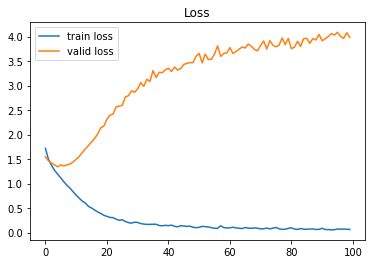

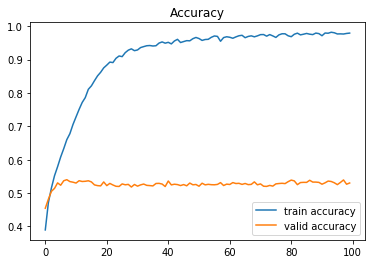

In [11]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()